In [1]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

#import solver related modules
from MCEq.core import MCEqRun
import mceq_config as config
#import primary model choices
import crflux.models as pm

In [2]:
mceq_run = MCEqRun(
#provide the string of the interaction model
interaction_model='SIBYLL2.3c',
#primary cosmic ray flux model
primary_model = (pm.HillasGaisser2012, "H3a"),
# Zenith angle in degrees. 0=vertical, 90=horizontal
theta_deg=0.0
)

MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


In [3]:
#Power of energy to scale the flux (the results will be returned as E**mag * flux)
mag = 0

#obtain energy grid (fixed) of the solution for the x-axis of the plots
e_grid = mceq_run.e_grid

#Dictionary for results
flux = {}

#Define a zenith angle, counted positively from vertical direction. Theta = 0. means vertical, theta = 90. horizontal
theta = 0

In [4]:
#Set the zenith angle
mceq_run.set_theta_deg(theta)
n_pts = 100
X_grid = np.linspace(0.1, mceq_run.density_model.max_X, n_pts)
mceq_run.set_single_primary_particle(1e3, pdg_id = 2212)
mceq_run.solve(int_grid=X_grid)

In [5]:
# Populate longitudinal spectra for all particles:
part_long_spectra = {}
for p in mceq_run.pman.all_particles:
    longitudinal_spectrum = []
    for idx in range(n_pts):
        longitudinal_spectrum.append(mceq_run.get_solution(p.name, grid_idx=idx))
    
    part_long_spectra[p.name] = (p, longitudinal_spectrum)

In [6]:
# Integrate all spectra
part_long_mult = {}
for pname, (pobj, long_spec) in part_long_spectra.items():
    res_mult = []
    for i, spec in enumerate(long_spec):
        etot_grid = e_grid + pobj.mass
        res_mult.append(integrate.simpson(spec*etot_grid, np.log(etot_grid)))
        
    part_long_mult[pname] = (part_long_spectra[pname][0], res_mult)

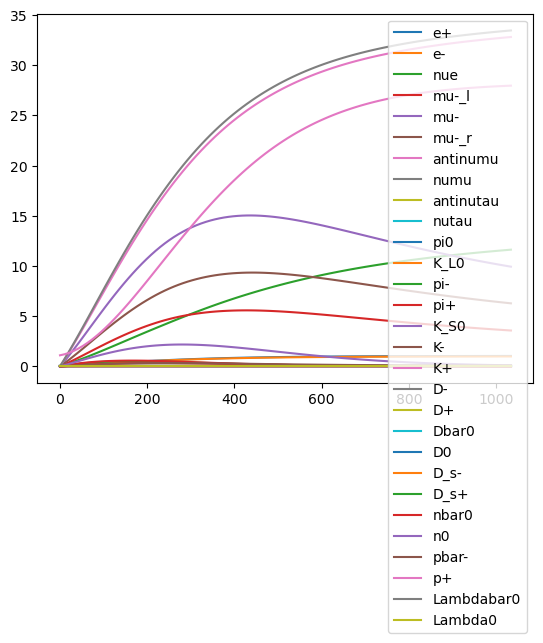

In [7]:
# Plot
for pname, (pobj, res_mult) in part_long_mult.items():
    if not pname in ["mu+_l", "mu+", "mu+_r", "gamma", "antinue"]:
    # if pname == "gamma":
        plt.plot(X_grid, res_mult, label = pname)
    
plt.legend()    